In [26]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [4]:
train_df.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [12]:
train_df.rename(columns = {'Subject Focus' : 'SubjectFocus'},inplace=True)

In [13]:
train_df.iloc[:,1:-1].columns

Index(['SubjectFocus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group',
       'Collage', 'Human', 'Occlusion', 'Info', 'Blur'],
      dtype='object')

In [16]:
res = ols('Pawpularity ~ SubjectFocus + Eyes + Face + Near + Action + Accessory + Group + Collage + Human + Occlusion + Info + Blur',data=train_df).fit()



In [17]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Pawpularity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.992
Date:                Sat, 09 Oct 2021   Prob (F-statistic):             0.0211
Time:                        02:11:37   Log-Likelihood:                -44035.
No. Observations:                9912   AIC:                         8.810e+04
Df Residuals:                    9899   BIC:                         8.819e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       37.3704      0.872     42.846      0.000      35.661      39.080
SubjectFocus    -1.1258      1.273     -0.884      0.377      -3.621       1.370
Eyes            -2.4801      0.749     -3.310      0.001      -3.949      -1.012
Face             2.4501      0.918      2.669      0.008       0.651       4.250
Near             0.4684      0.659      0.710      0.478      -0.824       1.761
Action          -0.3089      2.082     -0.148      0.882      -4.389       3.771
Accessory        1.2110      0.830      1.460      0.144      -0.415       2.837
Group            1.2200      0.659      1.853      0.064      -0.071       2.511
Collage          0.3970      1.123      0.353      0.724      -1.804       2.598
Human            0.3636      0.729      0.499      0.618      -1.065       1.792
Occlusion       -0.0663      0.719     -0.092      0.927      -1.475       1.342
Info            -0.7155      0.994     -0.720      0.472      -2.664       1.233
Blur            -3.7536      0.993     -3.781      0.000      -5.700      -1.807
==============================================================================
Omnibus:                     1776.760   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3060.238
Skew:                           1.170   Prob(JB):                         0.00
Kurtosis:                       4.390   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
anova_lm(res)

,df,sum_sq,mean_sq,F,PR(>F)
SubjectFocus,1.0,4.079964e+02,407.996353,0.963343,0.326370
Eyes,1.0,1.486385e+02,148.638527,0.350959,0.553584
Face,1.0,8.984342e+02,898.434201,2.121344,0.145291
Near,1.0,6.606233e+00,6.606233,0.015598,0.900611
Action,1.0,7.481385e+00,7.481385,0.017665,0.894268
Accessory,1.0,7.951323e+02,795.132304,1.877432,0.170657
Group,1.0,1.446344e+03,1446.343819,3.415044,0.064634
Collage,1.0,1.394229e-01,0.139423,0.000329,0.985524
Human,1.0,1.383347e+02,138.334750,0.326630,0.567663
Occlusion,1.0,1.931310e+01,19.313100,0.045601,0.830907


In [23]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

variables = train_df.columns[1:-1].tolist() ## 설명 변수 리스트
 
y = train_df['Pawpularity'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = train_df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(train_df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-23-bb17729f0a09>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-23-bb17729f0a09>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-23-bb17729f0a09>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-23-bb17729f0a09>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 

In [24]:
selected_variables

['Blur', 'Eyes', 'Face']

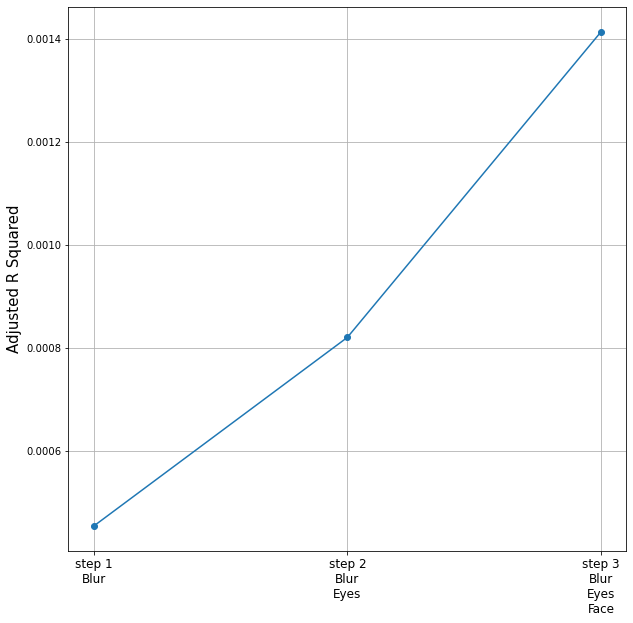

In [25]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()